In [402]:
import torch
import torch.nn as nn

print(torch.__version__)

2.0.1


In [403]:
class Simple1DConvNet(nn.Module):
    def __init__(self, input_channels, num_coefs):
        super(Simple1DConvNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=16, kernel_size=num_coefs, stride=1, padding=1, bias=False)
        self.fc = nn.Linear(64, num_coefs)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Create an instance of the model
input_channels = 1  # Assuming single channel input
num_classes = 10  # Adjust filter coeficients
model = Simple1DConvNet(input_channels, num_classes)

# Print the model summary
print(model)


Simple1DConvNet(
  (conv1): Conv1d(1, 16, kernel_size=(10,), stride=(1,), padding=(1,), bias=False)
  (fc): Linear(in_features=64, out_features=10, bias=True)
)


In [404]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FIRFilter1D(nn.Module):
    def __init__(self, num_taps):
        super(FIRFilter1D, self).__init__()
        self.num_taps = num_taps
        # Initialize filter taps as learnable parameters
        self.filter_taps = nn.Parameter(torch.randn(num_taps, 1), requires_grad=True)

    def forward(self, x):
        # Apply the FIR filter operation
        return F.conv1d(x, self.filter_taps.view(1, 1, -1))

# Example usage
num_taps = 5  # Modify as needed
fir_filter = FIRFilter1D(num_taps)

# Print the model summary
print(fir_filter)
input_data = torch.tensor([[1.0, 1.0, 1.0, 1.0, 1.0]], dtype=torch.float32)
fir_filter(input_data)

FIRFilter1D()


tensor([[-2.4757]], grad_fn=<SqueezeBackward1>)

Implement a FIR filter as a NN module

In [405]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FIRFilter1D(nn.Module):
    def __init__(self, num_taps):
        super(FIRFilter1D, self).__init__()
        self.num_taps = num_taps
        # Initialize filter taps as learnable parameters
        self.filter_taps = nn.Parameter(torch.randn(num_taps, 1), requires_grad=True)

    def forward(self, x):
        # Apply the FIR filter operation with appropriate padding
        filtered_signal = F.conv1d(x, self.filter_taps.view(1, 1, -1), padding=self.num_taps - 1)
        return filtered_signal



In [406]:
# Create a dummy input signal (e.g., a simple impulse)
input_data = torch.zeros(1, 1, 10)  # Input of length 10, all zeros
input_data[:, :, 0] = 1.0  # Impulse

# Apply the FIR filter to the input signal
filtered_signal = fir_filter(input_data)

print("Filtered signal:")
print(filtered_signal)

# signal is of length N+L-1

target_output = torch.zeros(1, 1, 19) 
target_output[:, :, 0] = 1.0  # Impulse
print(target_output, input_data)


Filtered signal:
tensor([[[-1.0383,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]],
       grad_fn=<ConvolutionBackward0>)
tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.]]]) tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])


In [407]:
import torch
import torch.nn as nn
import torch.optim as optim


# Initialize the FIRFilter1D model with 5 taps
num_taps = 10
fir_filter = FIRFilter1D(num_taps)

# Define a loss function (e.g., mean squared error)
criterion = nn.MSELoss()

# Define an optimizer (e.g., stochastic gradient descent)
optimizer = optim.SGD(fir_filter.parameters(), lr=0.01)

# Training loop
num_epochs = 1_0000
for epoch in range(num_epochs):
    # Forward pass
    output = fir_filter(input_data)

    # Compute the loss
    loss = criterion(output, target_output)

    # Zero the gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Print the learned filter taps
learned_taps = fir_filter.filter_taps.view(-1).detach().numpy()
print('Learned filter taps:', learned_taps)


Epoch [100/10000], Loss: 0.3558236360549927
Epoch [200/10000], Loss: 0.2882412374019623
Epoch [300/10000], Loss: 0.23349495232105255
Epoch [400/10000], Loss: 0.18914677202701569
Epoch [500/10000], Loss: 0.1532217264175415
Epoch [600/10000], Loss: 0.12412001192569733
Epoch [700/10000], Loss: 0.10054565221071243
Epoch [800/10000], Loss: 0.08144884556531906
Epoch [900/10000], Loss: 0.06597911566495895
Epoch [1000/10000], Loss: 0.05344754830002785
Epoch [1100/10000], Loss: 0.04329613596200943
Epoch [1200/10000], Loss: 0.03507281467318535
Epoch [1300/10000], Loss: 0.028411375358700752
Epoch [1400/10000], Loss: 0.023015135899186134
Epoch [1500/10000], Loss: 0.018643811345100403
Epoch [1600/10000], Loss: 0.015102756209671497
Epoch [1700/10000], Loss: 0.012234242632985115
Epoch [1800/10000], Loss: 0.009910567663609982
Epoch [1900/10000], Loss: 0.008028227835893631
Epoch [2000/10000], Loss: 0.0065034120343625546
Epoch [2100/10000], Loss: 0.005268210545182228
Epoch [2200/10000], Loss: 0.00426760

In [408]:
fir_filter(input_data)

tensor([[[ 9.9995e-01,  6.8867e-06, -4.5644e-06,  5.3435e-06, -3.6660e-05,
           2.0542e-05, -1.7733e-06,  3.9480e-05, -4.4734e-07,  1.3842e-05,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]],
       grad_fn=<ConvolutionBackward0>)

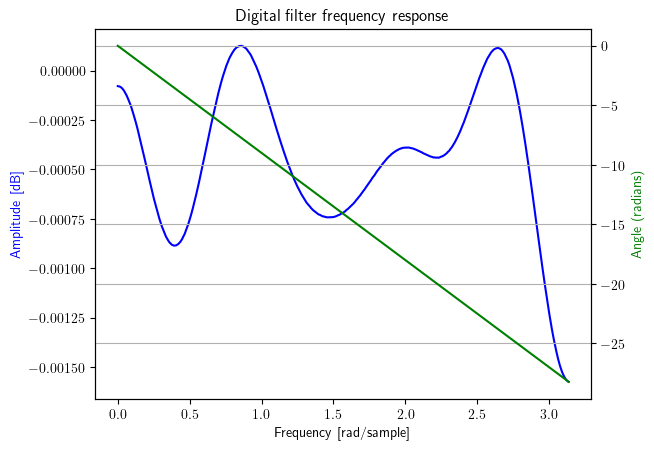

In [409]:
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join("..")))
from tools import plot, utils
import numpy as np

from scipy import signal

w, h = signal.freqz(learned_taps)
plot.bode_digital(w,h)


input data


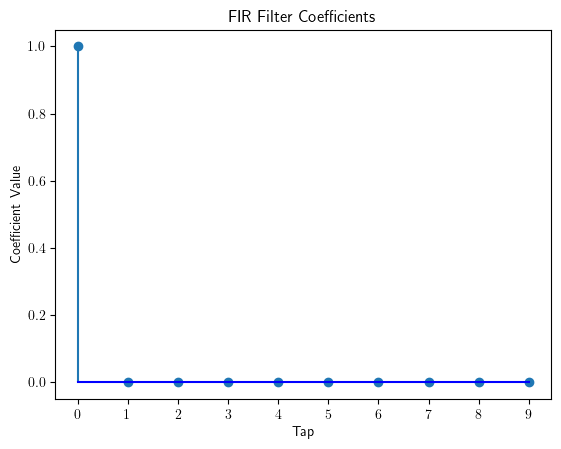

learned filter taps


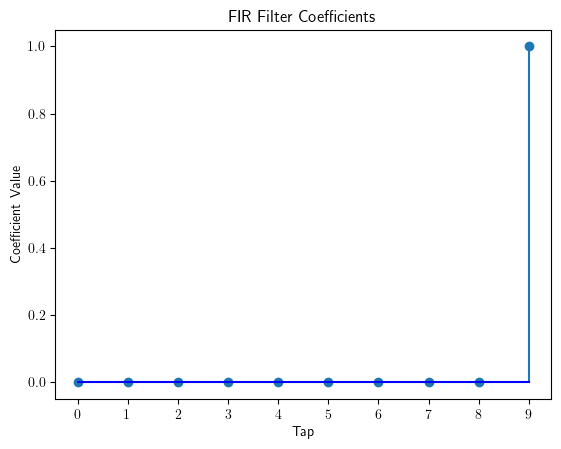

output of filter


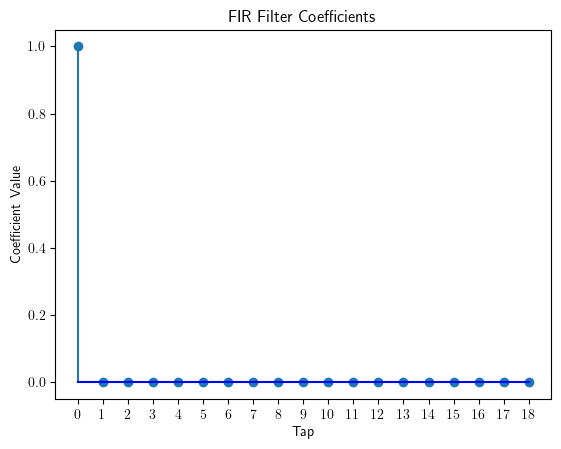

compare to numpy convolve


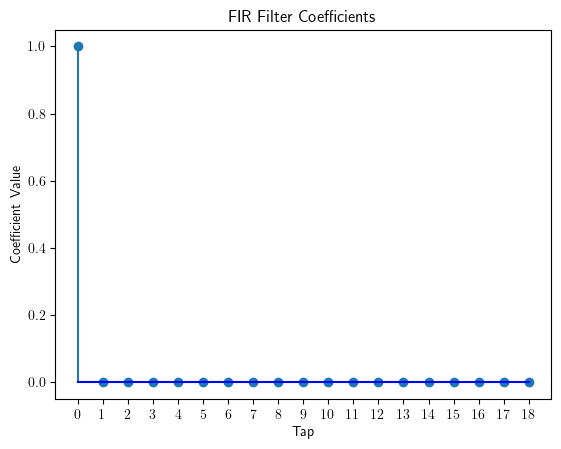

In [410]:
n  = fir_filter(input_data).detach().numpy()
print("input data")
plot.filter_coeffs(input_data[0][0])
print("learned filter taps")
plot.filter_coeffs(fir_filter.filter_taps.detach())

print("output of filter")
plot.filter_coeffs(n[0][0])
print("compare to numpy convolve")
plot.filter_coeffs(np.convolve(input_data.detach().numpy()[0][0],np.flip(fir_filter.filter_taps.detach().numpy()[:,0])))

torch.flip

In [411]:
class FIRFilter1DLinearPhase(nn.Module):
    def __init__(self, num_taps):
        super(FIRFilter1DLinearPhase, self).__init__()
        self.num_taps = num_taps
        # only allow odd number of taps
        assert num_taps % 1 != 0

        # Initialize filter taps as learnable parameters
        self.learnable_taps = nn.Parameter(
            torch.randn(num_taps // 2 + 1, 1), requires_grad=True
        )
        self.mirrored_taps = self.learnable_taps[1:]
        
        self.filter_taps = torch.cat([self.learnable_taps, self.mi])

    def forward(self, x):
        # Apply the FIR filter operation with appropriate padding
        filtered_signal = F.conv1d(
            x, self.filter_taps.view(1, 1, -1), padding=self.num_taps - 1
        )
        return filtered_signal

In [412]:
# torch.manual_seed(1)
# 
num_taps = 19
right_taps = torch.randn(num_taps // 2 + 1, 1)
learnable_taps = nn.Parameter(
    right_taps, requires_grad=True
) # taps from mid-index and higher are learnable
mirrored_taps = nn.Parameter(
    torch.flip(right_taps[1:],dims=[-2]), requires_grad=False
) # taps lower than the mid-index are mirrored from learnable taps
filter_taps = torch.cat([mirrored_taps, learnable_taps])

print(learnable_taps)
print(mirrored_taps)

out = F.conv1d(input_data, filter_taps.view(1, 1, -1), padding=num_taps - 1)
# print(nn.MSELoss()(target_output,out).backward())

Parameter containing:
tensor([[-0.3657],
        [ 1.1166],
        [ 1.4325],
        [-0.6148],
        [-0.4648],
        [-1.6742],
        [-1.4492],
        [ 1.7332],
        [-0.6398],
        [-0.8082]], requires_grad=True)
Parameter containing:
tensor([[-0.8082],
        [-0.6398],
        [ 1.7332],
        [-1.4492],
        [-1.6742],
        [-0.4648],
        [-0.6148],
        [ 1.4325],
        [ 1.1166]])


In [413]:
class FIRFilter1DLinearPhase(nn.Module):
    def __init__(self, num_taps):
        super(FIRFilter1DLinearPhase, self).__init__()
        self.num_taps = num_taps
        
        # only allow odd number of taps for now
        assert num_taps % 2 != 0, "Even number of taps not implemented"
        
        # Initialize parameters        
        self.learnable_taps = nn.Parameter(
            torch.randn(num_taps // 2 + 1, 1), requires_grad=True
        ) # taps from mid-index and higher are learnable
        
        self.mirrored_taps = nn.Parameter(
            torch.flip(self.learnable_taps[1:],dims=[-2]), requires_grad=False
        ) # taps lower than the mid-index are mirrored from learnable taps
        
        self.filter_taps = torch.cat([self.mirrored_taps, self.learnable_taps])        

    def forward(self, x):
        # Apply the FIR filter operation with appropriate padding
        filtered_signal = F.conv1d(
            x, self.filter_taps.view(1, 1, -1), padding=self.num_taps - 1
        )
        return filtered_signal


In [414]:
# Create a dummy input signal (e.g., a simple impulse)
input_data = torch.zeros(1, 1, 10)  # Input of length 10, all zeros
input_data[:, :, 0] = 1.0  # Impulse
# signal is of length N+L-1
target_output = torch.zeros(1, 1, 14) 
target_output[:, :, 0] = 1.0  # Impulse

print(target_output, input_data)


tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]) tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])


In [415]:
import torch
import torch.nn as nn

class FIRFilter1DLinearPhase(nn.Module):
    def __init__(self, num_taps):
        super(FIRFilter1DLinearPhase, self).__init__()
        self.num_taps = num_taps
        
        # only allow odd number of taps for now
        assert num_taps % 2 != 0, "Even number of taps not implemented"
        
        # Initialize parameters
        self.learnable_taps = nn.Parameter(torch.randn(num_taps // 2 + 1, 1))
        self.filter_taps = []

    def forward(self, x):
        # Mirroring the taps
        mirrored_taps = torch.flip(self.learnable_taps[1:], dims=[0])
        self.filter_taps = torch.cat([mirrored_taps, self.learnable_taps])

        # Apply the FIR filter operation
        filtered_signal = torch.conv1d(x, self.filter_taps.view(1, 1, -1), padding=self.num_taps - 1)

        return filtered_signal

# Example usage
num_taps = 5  # Example: 5 taps
fir_filter = FIRFilter1DLinearPhase(num_taps)

# Dummy input signal
x = torch.randn(1, 1, 10)  # Example: 1 sample, 1 channel, 10 time steps

# Forward pass
output = fir_filter(x)

# Print the output
print("Filtered signal:")
print(output)


Filtered signal:
tensor([[[-0.6771, -0.6518,  0.8903, -1.7104,  0.0161,  0.7462, -0.3989,
          -2.1592, -0.7873,  1.0563, -1.2509, -1.5965,  1.1627,  0.7258]]],
       grad_fn=<ConvolutionBackward0>)


In [416]:
import torch
import torch.nn as nn
import torch.optim as optim

# Initialize the FIRFilter1D model with 5 taps
num_taps = 5
fir_filter = FIRFilter1DLinearPhase(num_taps)

for name, param in fir_filter.named_parameters():
    if param.requires_grad:
        print(name, param.data, "\nno_grad")
    else:
        print(name, param.data, "\ngrad")

learnable_taps tensor([[ 1.5005],
        [-1.7619],
        [-0.1728]]) 
no_grad


In [417]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assume FIRFilter1DLinearPhase is defined as in the original question

# Create an instance of the model
num_taps = 49  # For example, using 5 taps
fir_filter = FIRFilter1DLinearPhase(num_taps)

# Dummy training data
# Random input data and target labels
input_data = torch.zeros(1, 1, 10)  # Input of length 10, all zeros
input_data[:, :, 0] = 1.0  # Impulse
# signal is of length N+L-1
target_output = torch.zeros(1, 1, 10+num_taps-1) 
target_output[:, :, 0] = 1.0  # Impulse
# --------------------------------------
# Random input data and target labels
target_output = torch.randn(1, 1, 10+num_taps-1) 
input_data = target_output[:,:,:10]  # Input of length 10, all zeros
# signal is of length N+L-1

print(target_output, input_data)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(fir_filter.parameters(), lr=0.01)

# Dummy training loop
num_epochs = 10000
for epoch in range(num_epochs):
    total_loss = 0.0

    # Forward pass and compute loss
    output = fir_filter(input_data)
    loss = criterion(output, target_output)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

    # Print the loss for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

# Optionally, you can save the trained model
# torch.save(fir_filter.state_dict(), 'fir_filter.pth')

fir_filter.learnable_taps
fir_filter.filter_taps

tensor([[[ 0.2027, -0.3688,  0.7374,  0.2086,  1.9725,  3.0869, -0.8001,
           0.8071, -0.8335,  0.2360, -0.5455, -0.6559, -1.9861, -0.7377,
           0.8336,  0.2462,  0.8963,  0.1297, -1.2078,  0.1129, -1.3537,
           0.4098, -0.5226,  0.1176, -0.3643,  0.1690, -1.1481,  0.9859,
           1.2348, -0.3408,  1.3825, -1.4187,  0.7426, -1.0254, -1.3335,
          -1.2673,  0.5000,  2.4949,  1.3598,  0.8067, -1.1651,  0.6058,
          -0.2133,  0.9136, -0.8124, -0.8811, -0.2669, -0.2247,  0.3493,
          -0.4147, -0.2090,  0.5279, -1.2952,  0.4254,  0.5098, -0.9893,
          -0.9253, -0.5301]]]) tensor([[[ 0.2027, -0.3688,  0.7374,  0.2086,  1.9725,  3.0869, -0.8001,
           0.8071, -0.8335,  0.2360]]])
Epoch 1/10000, Loss: 10.943371772766113
Epoch 2/10000, Loss: 10.744771003723145
Epoch 3/10000, Loss: 10.549671173095703
Epoch 4/10000, Loss: 10.35810375213623
Epoch 5/10000, Loss: 10.17006778717041
Epoch 6/10000, Loss: 9.98551082611084
Epoch 7/10000, Loss: 9.8043575286865

Epoch 228/10000, Loss: 0.6153714656829834
Epoch 229/10000, Loss: 0.6122879981994629
Epoch 230/10000, Loss: 0.6092541813850403
Epoch 231/10000, Loss: 0.6062689423561096
Epoch 232/10000, Loss: 0.6033317446708679
Epoch 233/10000, Loss: 0.6004415154457092
Epoch 234/10000, Loss: 0.5975978374481201
Epoch 235/10000, Loss: 0.5947997570037842
Epoch 236/10000, Loss: 0.5920464992523193
Epoch 237/10000, Loss: 0.5893374681472778
Epoch 238/10000, Loss: 0.5866718292236328
Epoch 239/10000, Loss: 0.5840491056442261
Epoch 240/10000, Loss: 0.5814683437347412
Epoch 241/10000, Loss: 0.5789290070533752
Epoch 242/10000, Loss: 0.5764303803443909
Epoch 243/10000, Loss: 0.5739719867706299
Epoch 244/10000, Loss: 0.5715529918670654
Epoch 245/10000, Loss: 0.5691727995872498
Epoch 246/10000, Loss: 0.5668309926986694
Epoch 247/10000, Loss: 0.5645267367362976
Epoch 248/10000, Loss: 0.5622594952583313
Epoch 249/10000, Loss: 0.5600286722183228
Epoch 250/10000, Loss: 0.5578337907791138
Epoch 251/10000, Loss: 0.555674195

tensor([[ 0.4435],
        [-0.0775],
        [ 0.1234],
        [-0.1202],
        [ 0.0286],
        [-0.0026],
        [ 0.0134],
        [-0.2749],
        [-0.3184],
        [ 0.0458],
        [ 0.1828],
        [ 0.0030],
        [ 0.1830],
        [-0.2852],
        [ 0.1969],
        [ 0.0473],
        [ 0.2818],
        [-0.1859],
        [-0.2165],
        [-0.1541],
        [ 0.0921],
        [-0.1148],
        [-0.1548],
        [ 0.4115],
        [-0.1395],
        [ 0.4115],
        [-0.1548],
        [-0.1148],
        [ 0.0921],
        [-0.1541],
        [-0.2165],
        [-0.1859],
        [ 0.2818],
        [ 0.0473],
        [ 0.1969],
        [-0.2852],
        [ 0.1830],
        [ 0.0030],
        [ 0.1828],
        [ 0.0458],
        [-0.3184],
        [-0.2749],
        [ 0.0134],
        [-0.0026],
        [ 0.0286],
        [-0.1202],
        [ 0.1234],
        [-0.0775],
        [ 0.4435]], grad_fn=<CatBackward0>)

In [418]:
fir_filter.learnable_taps
fir_filter.filter_taps

tensor([[ 0.4435],
        [-0.0775],
        [ 0.1234],
        [-0.1202],
        [ 0.0286],
        [-0.0026],
        [ 0.0134],
        [-0.2749],
        [-0.3184],
        [ 0.0458],
        [ 0.1828],
        [ 0.0030],
        [ 0.1830],
        [-0.2852],
        [ 0.1969],
        [ 0.0473],
        [ 0.2818],
        [-0.1859],
        [-0.2165],
        [-0.1541],
        [ 0.0921],
        [-0.1148],
        [-0.1548],
        [ 0.4115],
        [-0.1395],
        [ 0.4115],
        [-0.1548],
        [-0.1148],
        [ 0.0921],
        [-0.1541],
        [-0.2165],
        [-0.1859],
        [ 0.2818],
        [ 0.0473],
        [ 0.1969],
        [-0.2852],
        [ 0.1830],
        [ 0.0030],
        [ 0.1828],
        [ 0.0458],
        [-0.3184],
        [-0.2749],
        [ 0.0134],
        [-0.0026],
        [ 0.0286],
        [-0.1202],
        [ 0.1234],
        [-0.0775],
        [ 0.4435]], grad_fn=<CatBackward0>)

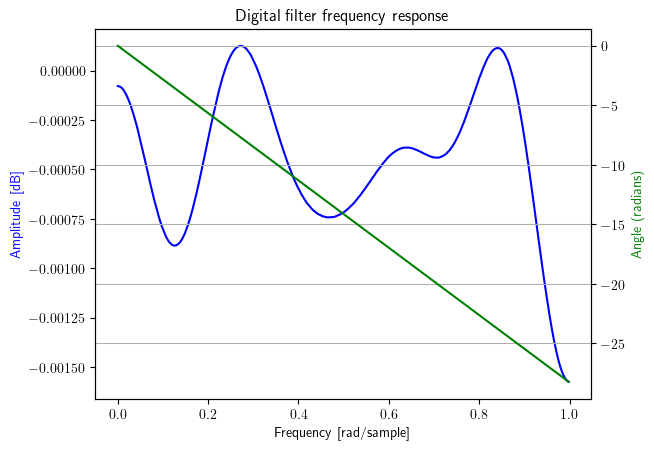

In [419]:
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join("..")))
from tools import plot, utils
import numpy as np

from scipy import signal

w, h = signal.freqz(learned_taps)
plot.bode_digital(w/np.pi,h)


input data


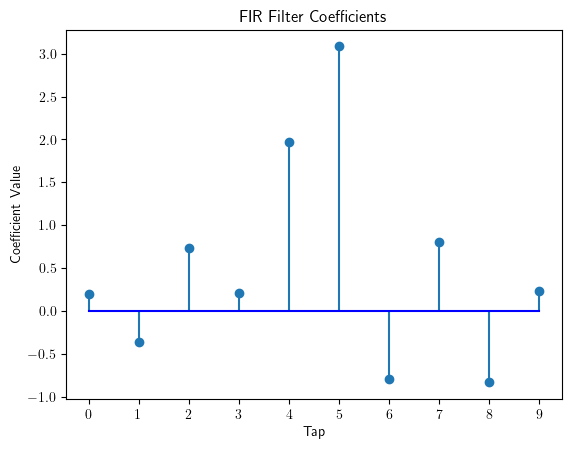

learned filter taps


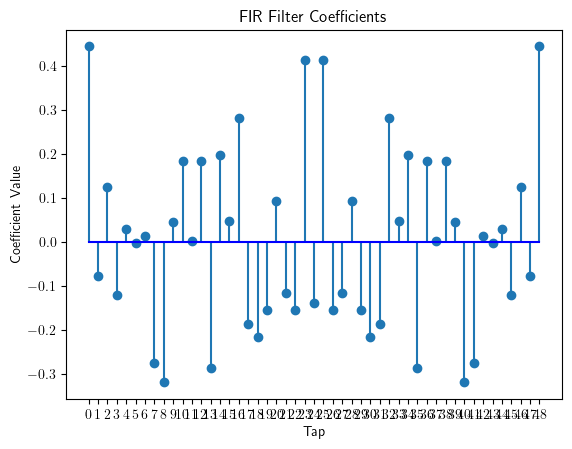

output of filter


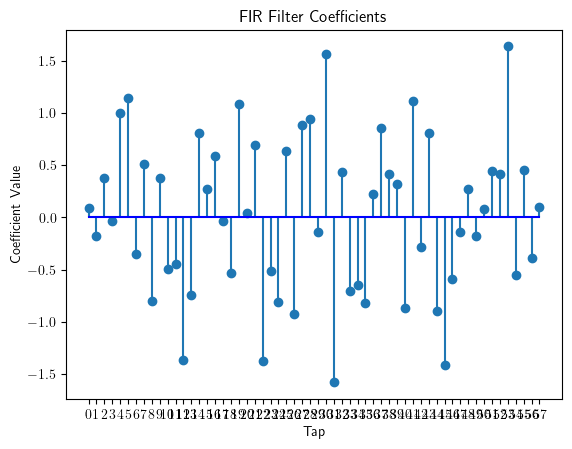

compare to numpy convolve


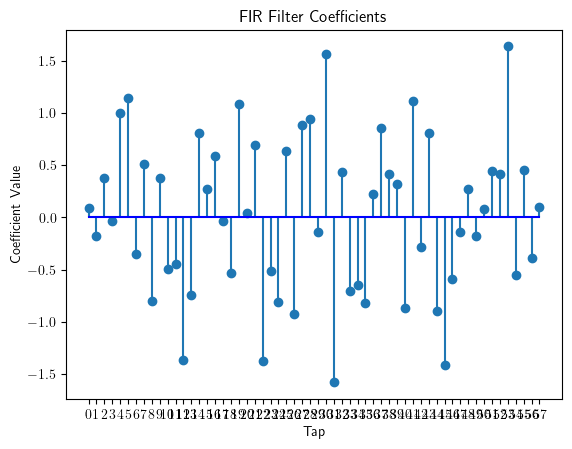

In [420]:
n  = fir_filter(input_data).detach().numpy()
print("input data")
plot.filter_coeffs(input_data[0][0])
print("learned filter taps")
plot.filter_coeffs(fir_filter.filter_taps.detach())

print("output of filter")
plot.filter_coeffs(n[0][0])
print("compare to numpy convolve")
plot.filter_coeffs(np.convolve(input_data.detach().numpy()[0][0],np.flip(fir_filter.filter_taps.detach().numpy()[:,0])))

In [421]:
fir_filter.filter_taps.detach().numpy().shape
input_data.detach().numpy()[0][0].shape
input_data.detach().numpy()[0][0]
fir_filter.filter_taps.detach().numpy()[:,0]

array([ 0.44356242, -0.07753827,  0.12361431, -0.12023834,  0.02859297,
       -0.00252523,  0.01338904, -0.2748557 , -0.31844214,  0.04578648,
        0.18286857,  0.00309306,  0.18312353, -0.28510314,  0.19714092,
        0.04756458,  0.28211206, -0.18574451, -0.21646306, -0.1540846 ,
        0.09205387, -0.11474932, -0.15479723,  0.41147894, -0.13950321,
        0.41147894, -0.15479723, -0.11474932,  0.09205387, -0.1540846 ,
       -0.21646306, -0.18574451,  0.28211206,  0.04756458,  0.19714092,
       -0.28510314,  0.18312353,  0.00309306,  0.18286857,  0.04578648,
       -0.31844214, -0.2748557 ,  0.01338904, -0.00252523,  0.02859297,
       -0.12023834,  0.12361431, -0.07753827,  0.44356242], dtype=float32)

In [422]:
import torch
import torch.nn as nn

class GammaToneFilter(nn.Module):
    def __init__(self, duration_sec, fc_hz, fs_hz, impairment_factor=0):
        super(GammaToneFilter, self).__init__()

        self.n = 4  # filter order
        self.phi_rad = 0  # initial phase

        ERB = 24.7 + 0.108 * fc_hz + impairment_factor
        self.b = 1.018 * ERB
        self.a = 6 / (-2 * 3.14159 * self.b) ** 4
        self.duration_sec = duration_sec
        self.fc_hz = fc_hz
        self.fs_hz = fs_hz

    def forward(self, t_sec):
        # Compute the impulse response for the given time values (t_sec)
        impulse_response = (
            self.a**-1
            * t_sec ** (self.n - 1)
            * torch.cos(2 * 3.14159 * self.fc_hz * t_sec + self.phi_rad)
            * torch.exp(-2 * 3.14159 * self.b * t_sec)
        )
        return impulse_response

# Example usage
duration_sec = 0.1
fc_hz = 1000
fs_hz = 44100
impairment_factor = 0.1

# Create an instance of the GammaToneFilter
gamma_tone_filter = GammaToneFilter(duration_sec, fc_hz, fs_hz, impairment_factor)

# Generate a time vector for the impulse response
t_sec = torch.arange(0, duration_sec, 1 / fs_hz)

# Compute the impulse response using the forward method
impulse_response = gamma_tone_filter(t_sec)

# Print the impulse response
print(impulse_response)


tensor([0.0000e+00, 9.8230e-04, 7.4734e-03,  ..., 1.0750e-29, 1.1129e-29,
        1.1269e-29])


In [423]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from math import pi

class GammaToneFilter(nn.Module):
    def __init__(self, fc_hz, fs_hz, impairment_factor=0):
        super(GammaToneFilter, self).__init__()
        
        self.fc_hz = fc_hz
        self.fs_hz = fs_hz
        self.impairment_factor = impairment_factor

        ERB = 24.7 + 0.108 * fc_hz + impairment_factor
        b = 1.018 * ERB
        a = 6 / (-2 * pi * b) ** 4

        t = torch.arange(0, 1, 1 / fs_hz)
        self.filter_response = (
            a**-1
            * t ** 3
            * torch.cos(2 * pi * fc_hz * t)
            * torch.exp(-2 * pi * b * t)
        )

    def forward(self, x):
        # Apply the gamma-tone filter to the input signal
        filtered_signal = F.conv1d(x, self.filter_response.view(1, 1, -1), padding=len(self.filter_response) - 1)
        return filtered_signal

class GammaToneFilterbank(nn.Module):
    def __init__(self, center_frequencies, fs_hz, impairment_factor=0):
        super(GammaToneFilterbank, self).__init__()
        self.filters = nn.ModuleList([
            GammaToneFilter(fc, fs_hz, impairment_factor)
            for fc in center_frequencies
        ])

    def forward(self, x):
        # Apply the entire filterbank to the input signal
        outputs = [filter(x) for filter in self.filters]
        return outputs

# Example usage:
fs_hz = 44100  # Sample rate
center_frequencies = [100, 500, 1000]  # Center frequencies for the filterbank
impairment_factor = 0.1  # Impairment factor

filterbank = GammaToneFilterbank(center_frequencies, fs_hz, impairment_factor)

# Assuming you have an input signal x, you can pass it through the filterbank:
filtered_signals = filterbank(x)


In [424]:
filtered_signals

[tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.8552e-05,
           7.3230e-06, 0.0000e+00]]]),
 tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0014, 0.0002, 0.0000]]]),
 tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0106, 0.0014, 0.0000]]])]